## Part 3

In [1]:
setwd("/home/leoKraushaar/Documents/School/Year 3/Semester 2/STAT 413/Project/protests/")
set.seed(42)

### Libraries

In [2]:
library(MASS)
library(dplyr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Clean Data

In [3]:
newMonth <- function(x) {
    if (x %in% c("December", "January", "February")) {
        return("Winter")
    } else if (x %in% c("March", "April", "May")) {
        return("Spring")
    } else if (x %in% c("June", "July", "August")) {
        return("Summer")
    } else {
        return("Fall")
    }
}

In [4]:
new_retail <- read.csv("data/clean/new_retail.csv")[, -1]

new_retail$season <- as.factor(sapply(new_retail$month, newMonth))
new_retail$month <- NULL
colnames(new_retail)[1] <- "prov"

new_retail$year <- as.numeric(new_retail$year)
new_retail$prov <- as.factor(new_retail$prov)

head(new_retail)

,prov,retail,year,season
,<fct>,<int>,<dbl>,<fct>
1,Alberta,6726992,2017,Winter
2,British Columbia,7277591,2017,Winter
3,Manitoba,1749096,2017,Winter
4,New Brunswick,1049815,2017,Winter
5,Newfoundland and Labrador,800919,2017,Winter
6,Northwest Territories,65317,2017,Winter


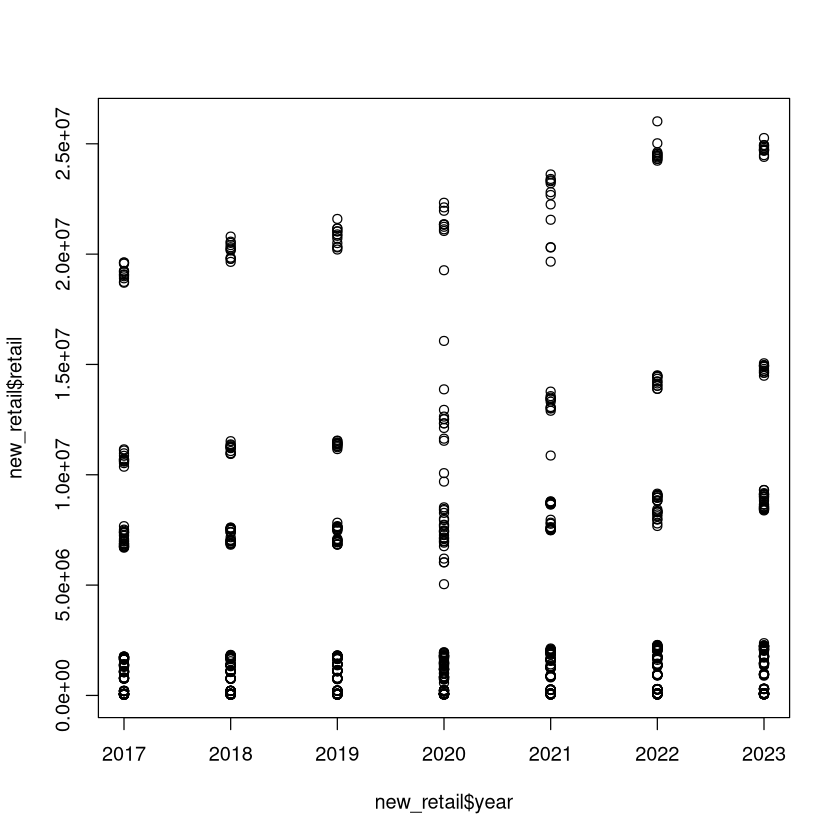

In [5]:
plot(new_retail$year, new_retail$retail, type="p")

In [6]:
retail_predictor <- step(lm(retail ~ ., data=new_retail))
summary(retail_predictor)

Start:  AIC=29552.41
retail ~ prov + year + season

         Df  Sum of Sq        RSS   AIC
<none>                 5.9960e+14 29552
- season  3 8.0735e+12 6.0767e+14 29561
- year    1 1.8588e+14 7.8548e+14 29845
- prov   12 4.2392e+16 4.2991e+16 34194



Call:
lm(formula = retail ~ prov + year + season, data = new_retail)

Residuals:
     Min       1Q   Median       3Q      Max 
-7709160  -300011   -45066   329186  3847004 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -409202370   22826475 -17.927  < 2e-16 ***
provBritish Columbia              731375     115239   6.347 3.24e-10 ***
provManitoba                    -5471763     115239 -47.482  < 2e-16 ***
provNew Brunswick               -6192468     115239 -53.736  < 2e-16 ***
provNewfoundland and Labrador   -6572306     115239 -57.032  < 2e-16 ***
provNorthwest Territories       -7335838     115239 -63.657  < 2e-16 ***
provNova Scotia                 -5891235     115239 -51.122  < 2e-16 ***
provNunavut                     -7363982     115239 -63.902  < 2e-16 ***
provOntario                     14308586     115239 124.164  < 2e-16 ***
provPrince Edward Island        -7168491     115239 -62.205  < 2e-16 ***
provQueb

In [7]:
data <- read.csv("data/merged_data.csv")[, -1]
data$food <- NULL
data$manufac <- NULL

In [8]:
head(data)

,year,month,GEO,pop,protests,retail,oil,power
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>
1,2022,April,Alberta,4480956,17,7989056,3983,6069621
2,2022,April,British Columbia,5310164,42,8959229,77433,5240902
3,2022,April,Manitoba,1405197,2,2083495,6290,2168371
4,2022,April,New Brunswick,801778,5,1340707,1818,1171958
5,2022,April,Newfoundland and Labrador,529249,2,920444,77160,686123
6,2022,April,Northwest Territories,44828,0,76390,0,58889


In [9]:


data$month <- sapply(data$month, newMonth)
colnames(data)[2] <- "season"

In [10]:
standardize <- function(x, mu, std) {
    return((x-mu)/std)
}

# data$pop <- sapply(data$pop, function(x) standardize(x, mean(data$pop), sd(data$pop)))

In [11]:
colnames(data)[colnames(data) == "GEO"] <- "prov"

data$prov  <- as.factor(data$prov)
data$season <- as.factor(data$season)
data$year <- as.factor(data$year)

In [12]:
total_protests <- data[as.character(data$year) == "2023", ] %>% group_by(prov) %>% summarise(total = sum(protests))
total_protests %>% group_by(prov) %>% summarise(mean = mean(total))

prov,mean
<fct>,<dbl>
Alberta,139
British Columbia,284
Manitoba,118
New Brunswick,61
Newfoundland and Labrador,61
Northwest Territories,6
Nova Scotia,85
Nunavut,11
Ontario,627


In [13]:
# data$retail <- NULL
head(data)

,year,season,prov,pop,protests,retail,oil,power
,<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<int>,<int>
1,2022,Spring,Alberta,4480956,17,7989056,3983,6069621
2,2022,Spring,British Columbia,5310164,42,8959229,77433,5240902
3,2022,Spring,Manitoba,1405197,2,2083495,6290,2168371
4,2022,Spring,New Brunswick,801778,5,1340707,1818,1171958
5,2022,Spring,Newfoundland and Labrador,529249,2,920444,77160,686123
6,2022,Spring,Northwest Territories,44828,0,76390,0,58889


### Build Model

In [14]:
# std_data <- data
# std_data$retail <- sapply(std_data$retail, function(x) {standardize(x, mean(std_data$retail), sd(std_data$retail))})


# model <- glm.nb(protests ~ prov + retail + season, data=std_data)

model <- glm.nb(protests ~ prov + retail + season, data=data)
summary(model)



Call:
glm.nb(formula = protests ~ prov + retail + season, data = data, 
    init.theta = 8.30561596, link = log)

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    4.994e+00  1.256e+00   3.975 7.03e-05 ***
provBritish Columbia           8.155e-01  1.631e-01   5.000 5.73e-07 ***
provManitoba                  -1.915e+00  9.211e-01  -2.079 0.037605 *  
provNew Brunswick             -2.624e+00  1.044e+00  -2.513 0.011965 *  
provNewfoundland and Labrador -3.070e+00  1.113e+00  -2.757 0.005833 ** 
provNorthwest Territories     -5.358e+00  1.269e+00  -4.224 2.40e-05 ***
provNova Scotia               -2.413e+00  9.935e-01  -2.429 0.015133 *  
provNunavut                   -4.985e+00  1.263e+00  -3.947 7.92e-05 ***
provOntario                    5.597e+00  2.449e+00   2.285 0.022314 *  
provPrince Edward Island      -4.113e+00  1.216e+00  -3.382 0.000719 ***
provQuebec                     2.190e+00  9.316e-01   2.351 0.018711

## Perform Monte Carlo Simulation

In [15]:
data <- data[c("prov", "season", "retail", "year")]

dim(data[as.character(data$year) == "2023", ][, c(-3)])

[1] 143   3

### Create New Data

#### 1. High Retail Sales

In [16]:
num_iterations <- 2860
results <- c()

retail_pred_std <- summary(retail_predictor)$sigma
bar <- txtProgressBar(min=0, max=num_iterations, style=1)

for (i in 1:num_iterations) {
    # Get constant values
    blank_data <- data[as.character(data$year) == "2023", ][, c(-3)]

    blank_data$year <- 2030

	retail_preds <- predict.lm(retail_predictor, newdata=blank_data, interval = "prediction")
	pred_means <- retail_preds[, "fit"]
    
	# Predict retail stochastically
    blank_data <- cbind(blank_data, retail_preds)
    blank_data <- as.data.frame(blank_data)
    pred_retails <- rnorm(n=nrow(blank_data), mean=pred_means, sd=retail_pred_std)
    
    blank_data$retail <- pred_retails
    blank_data[, c("fit", "lwr", "upr")] <- NULL
    blank_data$year <- NULL
    
    # Predict protests
    blank_data$protests <- predict.glm(model, newdata=blank_data, type="response")
    # Round off to nearest integer
    blank_data$protests <- round(blank_data$protests)

    rownames(blank_data) <- NULL
    results <- rbind(results, blank_data)
	setTxtProgressBar(bar, i)
}
close(bar)

In [18]:
results

prov,season,retail,protests
<fct>,<fct>,<dbl>,<dbl>
Alberta,Spring,10359631.2,9
British Columbia,Spring,9645387.9,25
Manitoba,Spring,4135183.9,7
New Brunswick,Spring,3615926.1,4
Newfoundland and Labrador,Spring,3065366.1,3
Northwest Territories,Spring,1920653.8,0
Nova Scotia,Spring,4573374.5,4
Nunavut,Spring,1901073.3,1
Ontario,Spring,25151767.8,53


In [19]:
write.csv(results, "data/montecarlo/2030_norm.csv")